# Lecture #5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The DataFrame Data Structure

### Initializing DataFrame

In [2]:
import pandas as pd
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3])
df

,Cost,Item Purchased,Name
0,22.5,Dog Food,Chris
1,2.5,Kitty Litter,Kevyn
2,5.0,Bird Seed,Vinod


In [3]:
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


## Indexing DataFrame

### Indexing with column names or `loc()`

In [4]:
df['Cost']

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [5]:
df[['Cost', 'Name']]

,Cost,Name
Store 1,22.5,Chris
Store 1,2.5,Kevyn
Store 2,5.0,Vinod


In [6]:
df.loc['Store 2']

Cost                      5
Item Purchased    Bird Seed
Name                  Vinod
Name: Store 2, dtype: object

In [7]:
type(df.loc['Store 2'])

pandas.core.series.Series

In [8]:
df.loc['Store 1']

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [9]:
type(df.loc['Store 1'])

pandas.core.frame.DataFrame

In [10]:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [11]:
df.T

,Store 1,Store 1,Store 2
Cost,22.5,2.5,5
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Name,Chris,Kevyn,Vinod


In [12]:
df.T.loc['Cost']

Store 1    22.5
Store 1     2.5
Store 2       5
Name: Cost, dtype: object

In [13]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [14]:
df.loc['Store 1']['Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [15]:
df.loc['Store 1', 'Cost']

Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [16]:
df.loc[:,['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0


In [17]:
# IMPORTANT: when slicing with column names, the 'end' is INCLUDED!!!
df.loc[:, 'Cost':'Name']

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


### Indexing with `iloc()`

In [18]:
df.iloc[1]

Cost                       2.5
Item Purchased    Kitty Litter
Name                     Kevyn
Name: Store 1, dtype: object

In [19]:
df.iloc[0:2]

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [20]:
df.iloc[:,0:1]

,Cost
Store 1,22.5
Store 1,2.5
Store 2,5.0


### Indexing with `ix()`: deprecated!!!

- `loc` works on labels in the index.
- `iloc` works on the positions in the index (so it only takes integers).
- `ix` usually tries to behave like loc but falls back to behaving like iloc if the label is not in the index.

See [Deprecate .ix](http://pandas-docs.github.io/pandas-docs-travis/whatsnew.html#deprecate-ix) from pandas v0.20.0. I explain this just in case you encounter python codes with old pandas version.

In [21]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [22]:
df.ix?

In [23]:
df.ix['Store 1']

/Users/chomg/.envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn


In [24]:
df.ix[1]

Cost                       2.5
Item Purchased    Kitty Litter
Name                     Kevyn
Name: Store 1, dtype: object

In [25]:
df.ix['Store 1':'Store 2']

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [26]:
df.ix[1:3]

,Cost,Item Purchased,Name
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [27]:
df.ix['Store 1', 1:3]

,Item Purchased,Name
Store 1,Dog Food,Chris
Store 1,Kitty Litter,Kevyn


In [28]:
df.ix['Store 1', ['Name', 'Cost']]

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5


### Drop selected rows or columns

In [29]:
df.drop('Store 1')

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [30]:
df.drop('Name', axis=1)

,Cost,Item Purchased
Store 1,22.5,Dog Food
Store 1,2.5,Kitty Litter
Store 2,5.0,Bird Seed


In [31]:
df.drop(['Name', 'Cost'], axis=1)

,Item Purchased
Store 1,Dog Food
Store 1,Kitty Litter
Store 2,Bird Seed


In [32]:
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Bird Seed,Vinod


In [33]:
copy_df = df.copy()
copy_df = copy_df.drop('Store 1')
copy_df

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [34]:
copy_df.drop?

In [35]:
copy_df

,Cost,Item Purchased,Name
Store 2,5.0,Bird Seed,Vinod


In [36]:
del copy_df['Name']
copy_df

,Cost,Item Purchased
Store 2,5.0,Bird Seed


### `unique()`

In [37]:
df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [38]:
df.index.unique()

Index(['Store 1', 'Store 2'], dtype='object')

## Merging Dataframes


In [39]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


### Adding new column

In [40]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


In [41]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


In [42]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [43]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


In [44]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

In [45]:
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [46]:
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [47]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [48]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [49]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [50]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [51]:
# See options of `merge()`
pd.merge?

In [52]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [53]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [54]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


## Simple aggregation

See [Computations / Descriptive Stats](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats).

In [55]:
rnd_df = pd.DataFrame({'A': np.random.randint(0, 100, 5), 'B': np.random.randint(0, 100, 5)})
rnd_df

,A,B
0,45,27
1,59,61
2,4,27
3,28,31
4,24,12


In [56]:
rnd_df.mean()

A    32.0
B    31.6
dtype: float64

In [57]:
rnd_df.max()

A    59
B    61
dtype: int64

In [58]:
rnd_df.max(axis='columns') # or axis=1

0    45
1    61
2    27
3    31
4    24
dtype: int64

In [59]:
rnd_df.describe()

,A,B
count,5.000000,5.000000
mean,32.000000,31.600000
std,20.988092,17.966636
min,4.000000,12.000000
25%,24.000000,27.000000
50%,28.000000,27.000000
75%,45.000000,31.000000
max,59.000000,61.000000


### Simple plotting

See [Plotting](https://pandas.pydata.org/pandas-docs/stable/api.html#plotting).

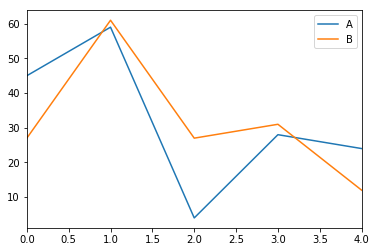

In [60]:
rnd_df.plot()

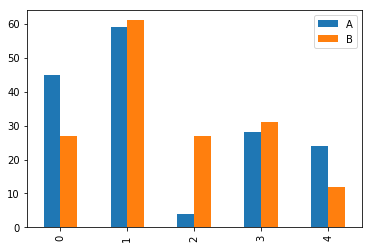

In [61]:
rnd_df.plot.bar();

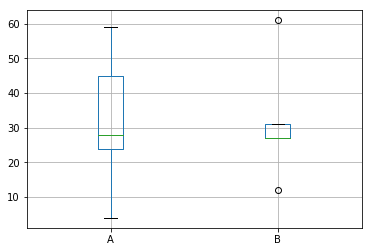

In [62]:
rnd_df.boxplot();

## Reading data from a file and writing to a file

In [63]:
filename = 'titanic_train.csv'
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
with open(filename, 'r') as f:
    for i in range(5):
        print(f.readline())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S

2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C

3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S

4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S



In [65]:
pd.read_csv?

In [66]:
df = df.iloc[:5,:7]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0


In [67]:
new_filename = 'titanic_modified.csv'
df.to_csv(new_filename, index=False)
with open(new_filename, 'r') as f:
    print(f.read())

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0



In [68]:
df.to_csv?

Note: This notebook is a modified version of pandas examples on coursera and 'Python Data Science Handbook'.